## 选择的数据集
1.SNAP(Stanford Large Network Dataset Collection)-Social circles: Facebook:

https://snap.stanford.edu/data/ego-Facebook.html

2.SNAP(Stanford Large Network Dataset Collection)-General Relativity and
Quantum Cosmology collaboration network:

https://snap.stanford.edu/data/ca-GrQc.html


## 1.Social circles: Facebook数据集

### 数据获取与预处理

* 数据获取

从 https://snap.stanford.edu/data/facebook_combined.txt.gz 下载数据文件

* 数据预处理

  1.处理缺失值（本数据集中无缺失值）

  2.数据提取：该数据集为图结构，数据文件内存储了图中所有的边。我们期望获得每个结点的邻居信息，因此需要对数据集进行遍历。







In [43]:
#all 0-4038 node num

with open('facebook_combined.txt') as f:
  lines = f.readlines()
  i=0
  m = {}
  v = []
  mode = []
  rec = -1
  for line in lines:
    i+=1
    a,b = line.split(" ")
    a = int(a)
    b = int(b[:-1])

    if rec!=a:
      if rec!=-1:
          mode.append(v)
          v = []
      rec = a
      if a in m.keys():
        for x in m[a]:
          v.append(x)
    if rec==a:
      v.append(b)

    if b not in m.keys():
      m[b] = [a]
    else:
      m[b].append(a)
    #m.update({b:a})

    if i==-1:
      break
#print(m)
#print(mode)
#print(mode[-1])
#print("  ")
#for l in range(len(mode)):
#  print(mode[l])

### 频繁模式挖掘

频繁模式：社交关系模式

In [44]:
#!pip install orange3-associate
import orangecontrib.associate.fpgrowth as oaf
items = list(oaf.frequent_itemsets(mode,0.055))
for i in items:
  print(set(i[0]),i[1],round(i[1]/4039,4),sep="  ")

{107}  986  0.2441
{1684}  731  0.181
{1912}  724  0.1793
{3437}  472  0.1169
{2543}  292  0.0723
{1912, 2543}  291  0.072
{2347}  289  0.0716
{1912, 2347}  288  0.0713
{2347, 2543}  236  0.0584
{1912, 2347, 2543}  235  0.0582
{0}  286  0.0708
{1888}  253  0.0626
{1888, 107}  252  0.0624
{1800}  244  0.0604
{1800, 107}  243  0.0602
{1800, 1888}  211  0.0522
{1800, 107, 1888}  210  0.052
{2266}  233  0.0577
{1912, 2266}  232  0.0574
{1663}  233  0.0577
{107, 1663}  232  0.0574
{1352}  232  0.0574
{1352, 107}  231  0.0572
{483}  226  0.056
{1730}  225  0.0557
{1730, 107}  224  0.0555
{1985}  223  0.0552
{1912, 1985}  222  0.055
{1941}  222  0.055
{1912, 1941}  221  0.0547
{2233}  221  0.0547
{1912, 2233}  220  0.0545
{2142}  220  0.0545
{1912, 2142}  219  0.0542
{2266, 2142}  211  0.0522
{1912, 2266, 2142}  210  0.052
{1431}  218  0.054
{107, 1431}  217  0.0537
{1199}  217  0.0537
{107, 1199}  216  0.0535
{348}  212  0.0525
{1584}  211  0.0522
{1584, 107}  210  0.052
{2206}  209  0.0517


### 关联规则挖掘

In [54]:
rules = list(oaf.association_rules(dict(items), 0.85))
for i in rules:
  print(set(i[0]), "->", set(i[1]), i[2], round(i[3],2))
print(len(rules))

{2347, 2543} -> {1912} 235 1.0
{1800, 1888} -> {107} 210 1.0
{1800, 107} -> {1888} 210 0.86
{1800} -> {1888, 107} 210 0.86
{2266, 2142} -> {1912} 210 1.0
{1912, 2142} -> {2266} 210 0.96
{2142} -> {1912, 2266} 210 0.95
{1912, 2266} -> {2142} 210 0.91
{2266} -> {1912, 2142} 210 0.9
{2266, 2206} -> {1912} 202 1.0
{1912, 2206} -> {2266} 202 0.97
{2206} -> {1912, 2266} 202 0.97
{1912, 2266} -> {2206} 202 0.87
{2266} -> {1912, 2206} 202 0.87
{2543} -> {1912} 291 1.0
{2347} -> {1912} 288 1.0
{1888} -> {107} 252 1.0
{1800} -> {107} 243 1.0
{1800} -> {1888} 211 0.86
{2266} -> {1912} 232 1.0
{1663} -> {107} 232 1.0
{1352} -> {107} 231 1.0
{1730} -> {107} 224 1.0
{1985} -> {1912} 222 1.0
{1941} -> {1912} 221 1.0
{2233} -> {1912} 220 1.0
{2142} -> {1912} 219 1.0
{2142} -> {2266} 211 0.96
{2266} -> {2142} 211 0.91
{1431} -> {107} 217 1.0
{1199} -> {107} 216 1.0
{1584} -> {107} 210 1.0
{2206} -> {1912} 208 1.0
{2206} -> {2266} 203 0.97
{2266} -> {2206} 203 0.87
{1768} -> {107} 206 1.0
{2611} -> {191

### 评价关联规则

使用Lift值对关联规则进行评价

In [53]:
measure = list(oaf.rules_stats(oaf.association_rules(dict(items), 0.85), dict(oaf.frequent_itemsets(mode, 0.055)), 4039))
for i in measure:
  print(set(i[0]), "->", set(i[1]), round(i[6], 2))

{2347, 2543} -> {1912} 5.56
{1800, 1888} -> {107} 4.08
{1800, 107} -> {1888} 13.8
{1800} -> {1888, 107} 13.79
{2266, 2142} -> {1912} 5.55
{1912, 2142} -> {2266} 16.62
{2142} -> {1912, 2266} 16.62
{1912, 2266} -> {2142} 16.62
{2266} -> {1912, 2142} 16.62
{2266, 2206} -> {1912} 5.55
{1912, 2206} -> {2266} 16.83
{2206} -> {1912, 2266} 16.83
{1912, 2266} -> {2206} 16.83
{2266} -> {1912, 2206} 16.83
{2543} -> {1912} 5.56
{2347} -> {1912} 5.56
{1888} -> {107} 4.08
{1800} -> {107} 4.08
{1800} -> {1888} 13.81
{2266} -> {1912} 5.55
{1663} -> {107} 4.08
{1352} -> {107} 4.08
{1730} -> {107} 4.08
{1985} -> {1912} 5.55
{1941} -> {1912} 5.55
{2233} -> {1912} 5.55
{2142} -> {1912} 5.55
{2142} -> {2266} 16.63
{2266} -> {2142} 16.63
{1431} -> {107} 4.08
{1199} -> {107} 4.08
{1584} -> {107} 4.08
{2206} -> {1912} 5.55
{2206} -> {2266} 16.84
{2266} -> {2206} 16.84
{1768} -> {107} 4.08
{2611} -> {1912} 5.55
{2229} -> {1912} 5.55
{2410} -> {1912} 5.55
{2218} -> {1912} 5.55
{1589} -> {107} 4.08
{2078} -> {19

### 分析

本数据集中，存在大量的频繁项集，为了减少打印的结果，我们设置相对支持度为0.055，置信度为0.85，并且对满足该要求的关联规则使用Lift值进行了评价。

Lift值大于1说明该规则为强关联规则。

根据上面打印的结果可以看到，所有筛选出的关联规则都是强关联。

以{1800, 107} -> {1888}为例，该条关联规则的置信度为0.86，Lift值为13.8，说明，若一个用户同时与编号为1800的用户和编号为107的用户有联系，则该用户有大概率与编号为1888的用户也存在联系。

### 可视化

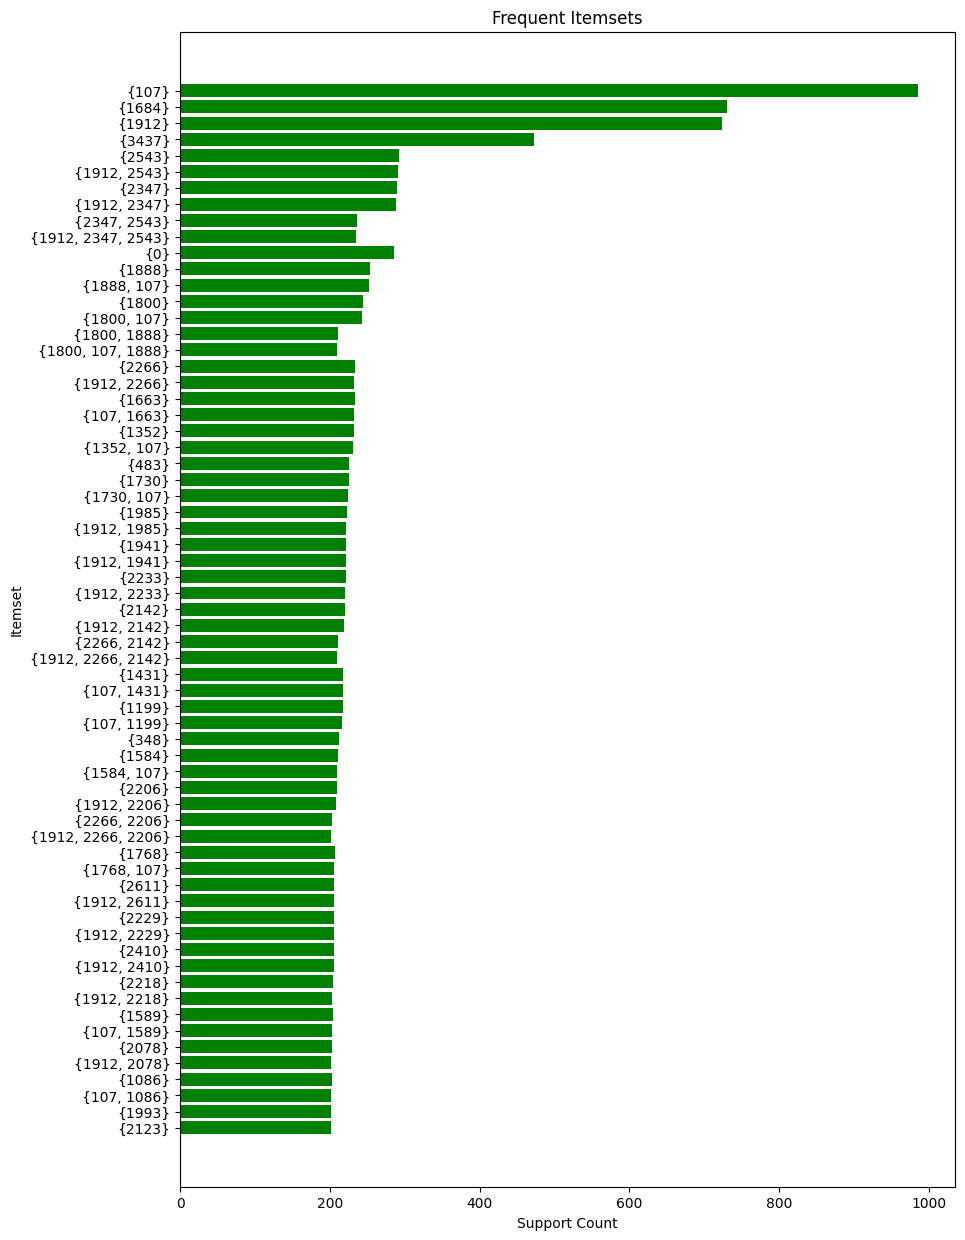

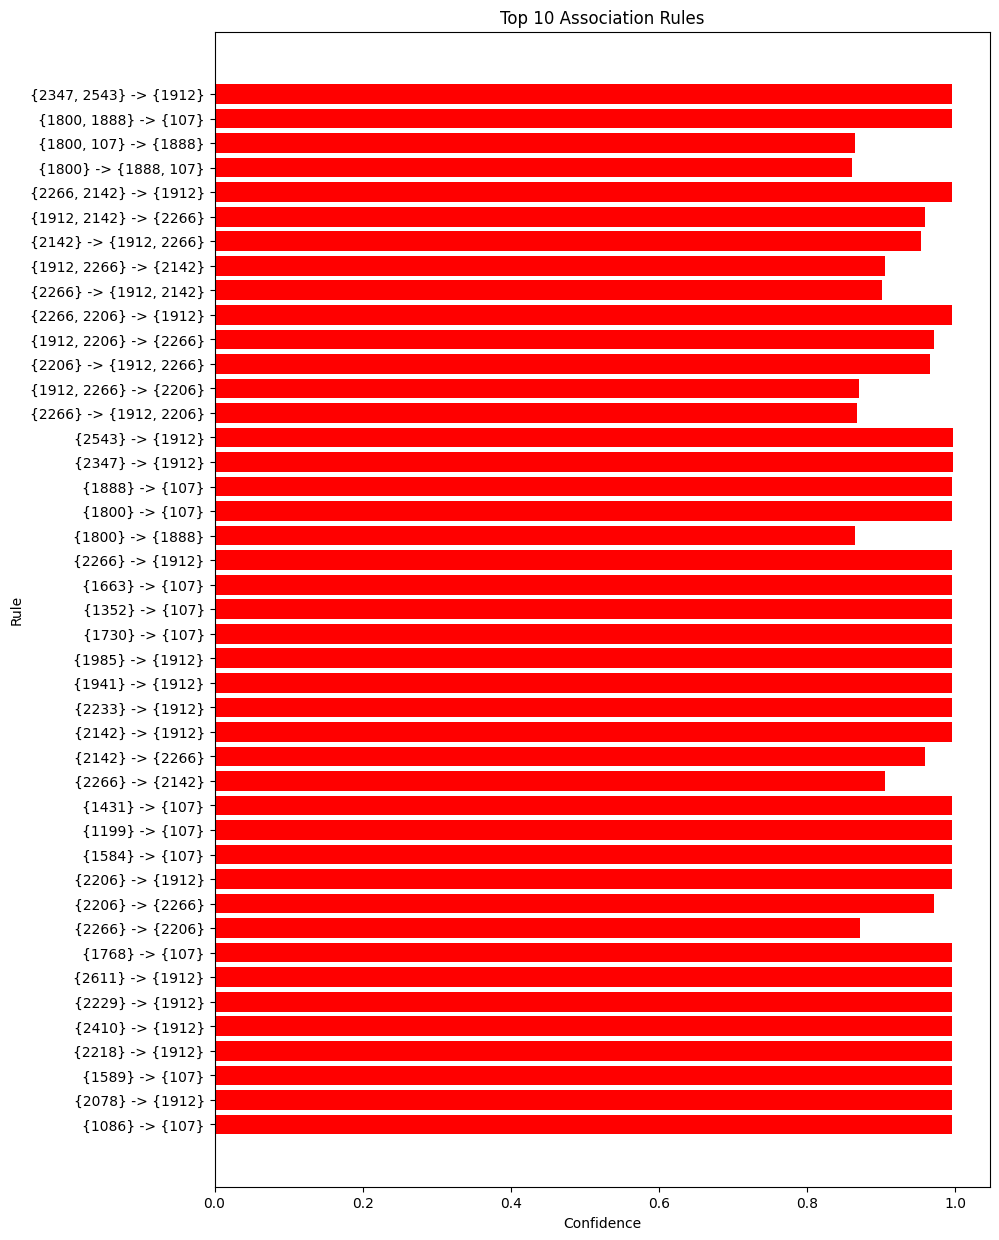

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
plt.barh([str(set(itemset)) for itemset, _ in items], [support_count for _, support_count in items], color='g')
plt.xlabel('Support Count')
plt.ylabel('Itemset')
plt.title('Frequent Itemsets')
plt.gca().invert_yaxis()  # 使得支持度高的项集在顶部显示
plt.show()


plt.figure(figsize=(10, 15))
plt.barh([f"{set(antecedent)} -> {set(consequent)}" for antecedent, consequent,_,_ in rules], [confidence for _,_,_, confidence in rules], color='r')
plt.xlabel('Confidence')
plt.ylabel('Rule')
plt.title('Association Rules')
plt.gca().invert_yaxis()  # 使得置信度高的规则在顶部显示
plt.show()

## 2.General Relativity and Quantum Cosmology collaboration network数据集

### 数据获取与预处理

* 数据获取

从 https://snap.stanford.edu/data/ca-GrQc.txt.gz 下载数据文件

* 数据预处理

  1.处理缺失值（本数据集中无缺失值）

  2.数据提取：该数据集为图结构，数据文件内存储了图中所有的边。我们期望获得每个结点的邻居信息，因此需要对数据集进行遍历。







In [84]:
#all 0-5241 node num

with open('CA-GrQc.txt') as f:
  lines = f.readlines()
  i=0
  m = {}
  v = []
  mode = []
  rec = -1
  for line in lines:
    if line[0]=='#':
      continue
    i+=1
    a,b = line.split("	")
    a = int(a)
    b = int(b[:-1])

    if rec!=a:
      if rec!=-1:
          mode.append(v)
          v = []
      rec = a
      if a in m.keys():
        for x in m[a]:
          v.append(x)
    if rec==a:
      v.append(b)

    if b not in m.keys():
      m[b] = [a]
    else:
      m[b].append(a)
    #m.update({b:a})

    if i==-1:
      break
#print(m)
#print(mode)
#print(mode[-1])
#print("  ")
#for l in range(len(mode)):
#  print(mode[l])

[9224, 16830, 9224, 16830]


### 频繁模式挖掘

频繁模式：论文合作模式

In [80]:
#!pip install orange3-associate
import orangecontrib.associate.fpgrowth as oaf
items = list(oaf.frequent_itemsets(mode,0.01))
for i in items:
  print(set(i[0]),i[1],round(i[1]/5242,4),sep="  ")

{21012}  81  0.0155
{22691}  77  0.0147
{22691, 21012}  61  0.0116
{21281}  79  0.0151
{6610}  68  0.013
{12365}  77  0.0147
{2741}  65  0.0124
{12365, 2741}  53  0.0101
{21012, 2741}  60  0.0114
{14807}  60  0.0114
{21012, 14807}  56  0.0107
{15003}  62  0.0118
{15003, 12365}  53  0.0101
{773}  55  0.0105
{21012, 773}  53  0.0101
{15244}  59  0.0113
{9785}  68  0.013
{9785, 15003}  55  0.0105
{17655}  66  0.0126
{19423}  63  0.012
{25758}  51  0.0097
{6512}  49  0.0093
{21508}  67  0.0128
{9785, 21508}  55  0.0105
{21508, 12365}  56  0.0107
{15003, 21508}  58  0.0111
{9785, 15003, 21508}  54  0.0103
{11241}  49  0.0093
{570}  48  0.0092
{13929}  45  0.0086
{23293}  53  0.0101
{21847}  48  0.0092
{24955}  51  0.0097
{4164}  54  0.0103
{7956}  56  0.0107
{18866}  44  0.0084
{6179}  46  0.0088
{45}  49  0.0093
{1653}  56  0.0107
{21281, 1653}  53  0.0101
{25346}  56  0.0107
{25346, 7956}  54  0.0103
{12781}  57  0.0109
{3372}  49  0.0093
{4511}  45  0.0086
{20635}  47  0.009
{15010}  42 

### 关联规则挖掘

In [82]:
rules = list(oaf.association_rules(dict(items), 0.8))
for i in rules:
  print(set(i[0]), "->", set(i[1]), i[2], round(i[3],2))
print(len(rules))

{15003, 21508} -> {9785} 54 0.93
{9785, 21508} -> {15003} 54 0.98
{21508} -> {9785, 15003} 54 0.81
{9785, 15003} -> {21508} 54 0.98
{15003} -> {9785, 21508} 54 0.87
{2741} -> {12365} 53 0.82
{2741} -> {21012} 60 0.92
{14807} -> {21012} 56 0.93
{15003} -> {12365} 53 0.85
{773} -> {21012} 53 0.96
{15003} -> {9785} 55 0.89
{9785} -> {15003} 55 0.81
{21508} -> {9785} 55 0.82
{9785} -> {21508} 55 0.81
{21508} -> {12365} 56 0.84
{21508} -> {15003} 58 0.87
{15003} -> {21508} 58 0.94
{1653} -> {21281} 53 0.95
{7956} -> {25346} 54 0.96
{25346} -> {7956} 54 0.96
20


### 评价关联规则

使用Lift值对关联规则进行评价

In [83]:
measure = list(oaf.rules_stats(oaf.association_rules(dict(items), 0.8), dict(oaf.frequent_itemsets(mode, 0.01)), 5242))
for i in measure:
  print(set(i[0]), "->", set(i[1]), round(i[6], 2))

{15003, 21508} -> {9785} 71.77
{9785, 21508} -> {15003} 83.01
{21508} -> {9785, 15003} 76.82
{9785, 15003} -> {21508} 76.82
{15003} -> {9785, 21508} 83.01
{2741} -> {12365} 55.51
{2741} -> {21012} 59.74
{14807} -> {21012} 60.4
{15003} -> {12365} 58.2
{773} -> {21012} 62.36
{15003} -> {9785} 68.38
{9785} -> {15003} 68.38
{21508} -> {9785} 63.28
{9785} -> {21508} 63.28
{21508} -> {12365} 56.9
{21508} -> {15003} 73.19
{15003} -> {21508} 73.19
{1653} -> {21281} 62.8
{7956} -> {25346} 90.26
{25346} -> {7956} 90.26


### 分析

本数据集中，存在大量的频繁项集，我们设置相对支持度为0.01，置信度为0.8，并且对满足该要求的关联规则使用Lift值进行了评价。

Lift值大于1说明该规则为强关联规则。

根据上面打印的结果可以看到，所有筛选出的关联规则都是强关联。

以{21508} -> {9785, 15003}为例，该条关联规则的Lift值为76.82，说明，若一个作者与编号为21508的作者共同合作过论文，则该作者有大概率与编号为9785的作者和编号为15003的作者也存在共同合作关系。

### 可视化

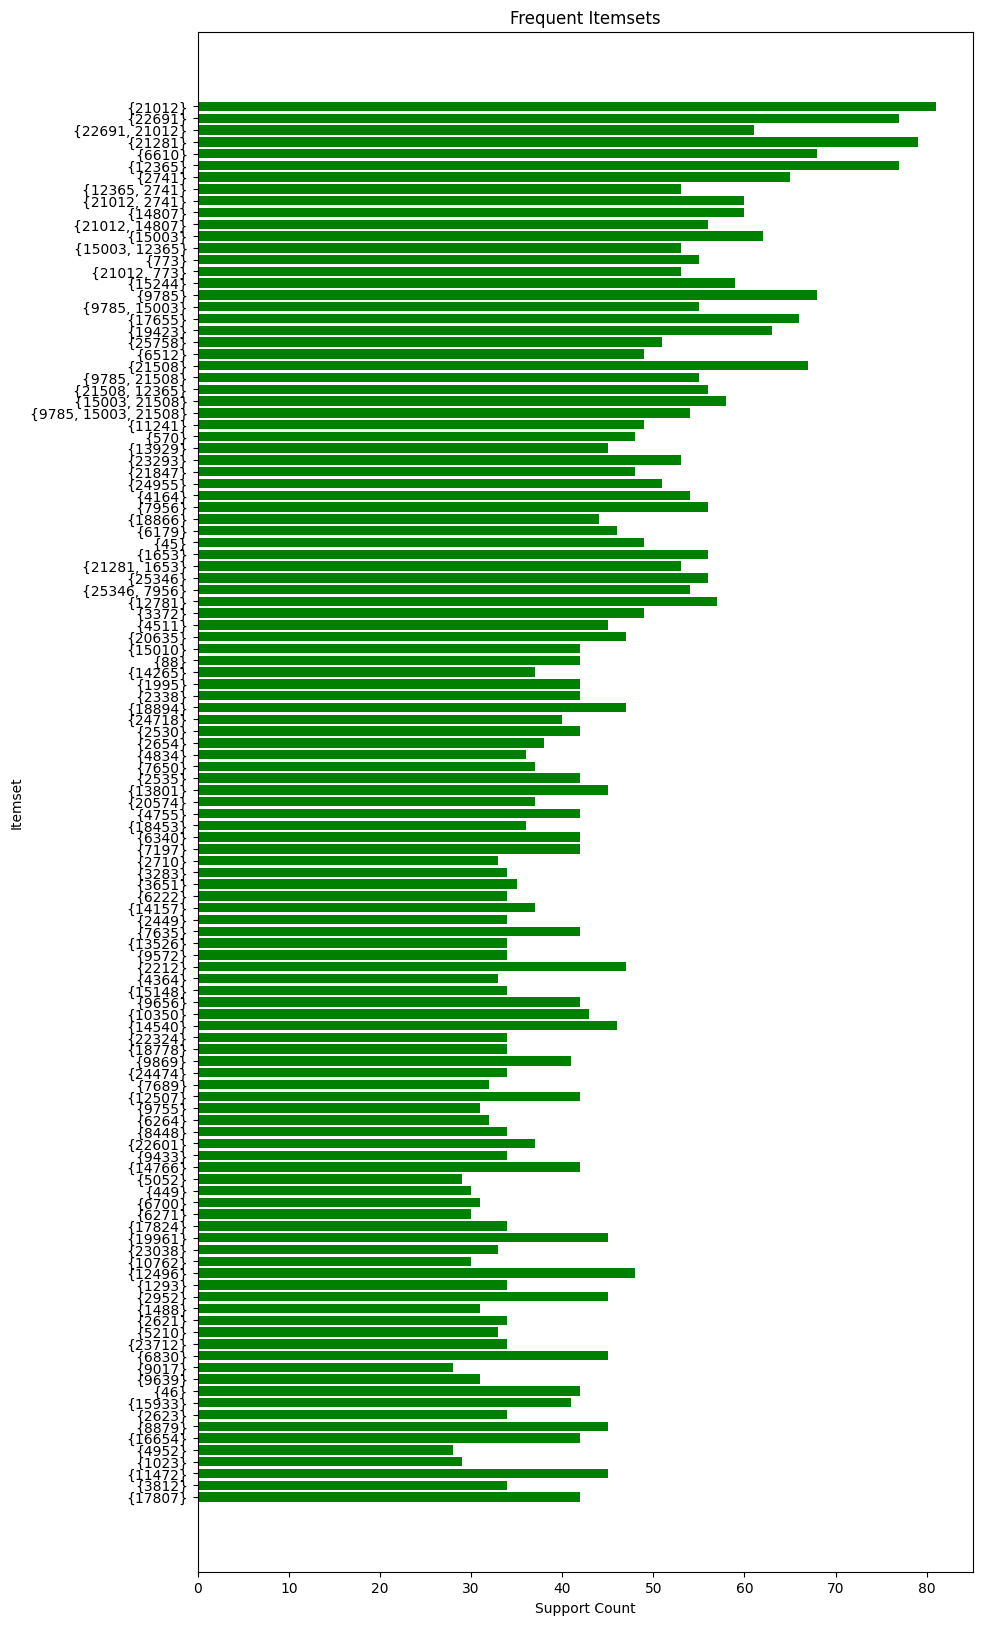

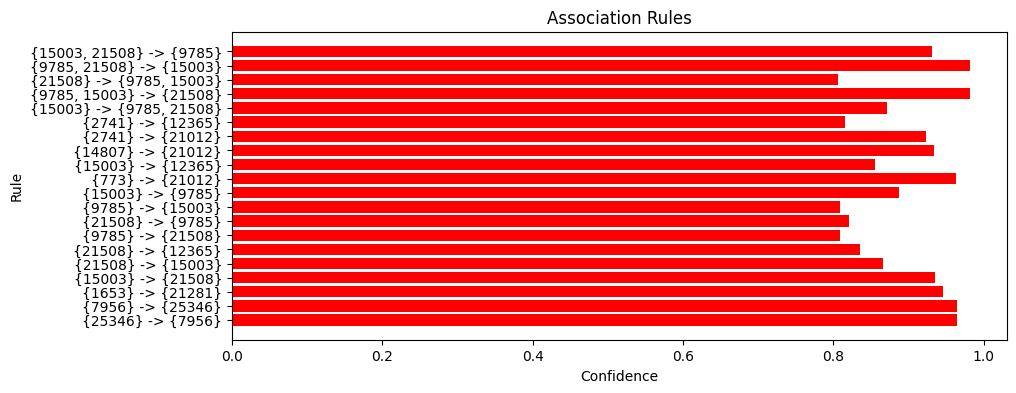

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))
plt.barh([str(set(itemset)) for itemset, _ in items], [support_count for _, support_count in items], color='g')
plt.xlabel('Support Count')
plt.ylabel('Itemset')
plt.title('Frequent Itemsets')
plt.gca().invert_yaxis()  # 使得支持度高的项集在顶部显示
plt.show()


plt.figure(figsize=(10, 4))
plt.barh([f"{set(antecedent)} -> {set(consequent)}" for antecedent, consequent,_,_ in rules], [confidence for _,_,_, confidence in rules], color='r')
plt.xlabel('Confidence')
plt.ylabel('Rule')
plt.title('Association Rules')
plt.gca().invert_yaxis()  # 使得置信度高的规则在顶部显示
plt.show()